In [1]:
#!/usr/bin/env python
# coding: utf-8

import os
import sys
sys.path.append('./')
sys.path.append('../')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import libs.plots as myplt
import config

# import numpy as np
# from scipy import stats
# import torchvision.transforms as transforms

In [2]:
ROOT_DIR = '.' if os.path.exists('config') else '..' 
train_csv = os.path.join(ROOT_DIR, 'dataset', 'train.csv')
train_df = pd.read_csv(train_csv)
train_id = train_df.pop('ID')

In [3]:
pt = PowerTransformer()

X_pt = pt.fit_transform(train_df.values)
pt_lambdas = pd.DataFrame({'cols':train_df.columns , 'pt_lambdas': pt.lambdas_})

train_df_pt = pd.DataFrame(X_pt, columns=train_df.columns)

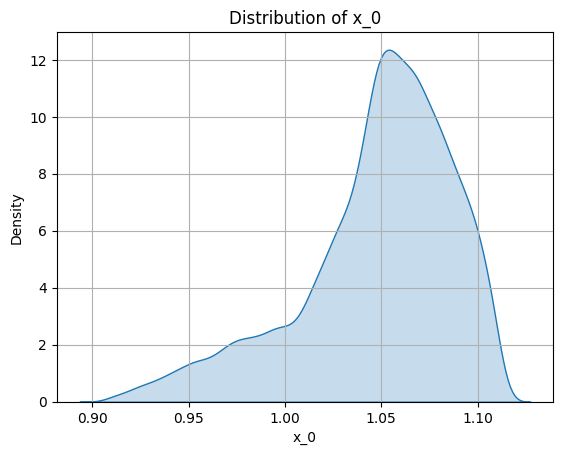

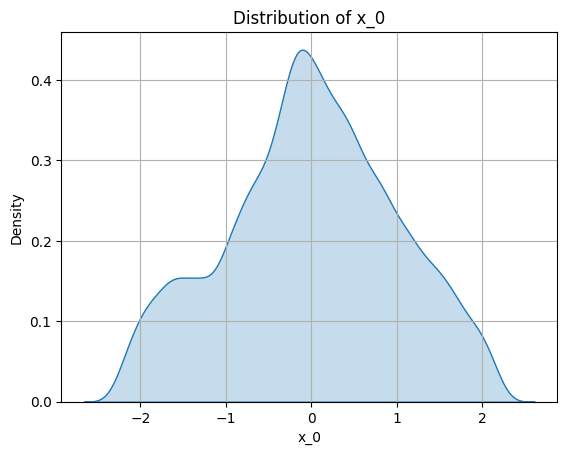

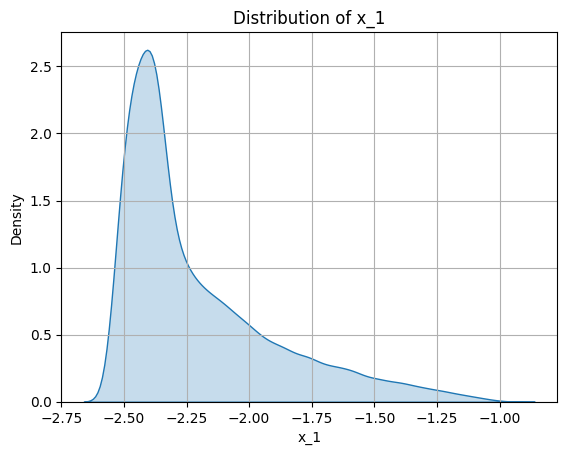

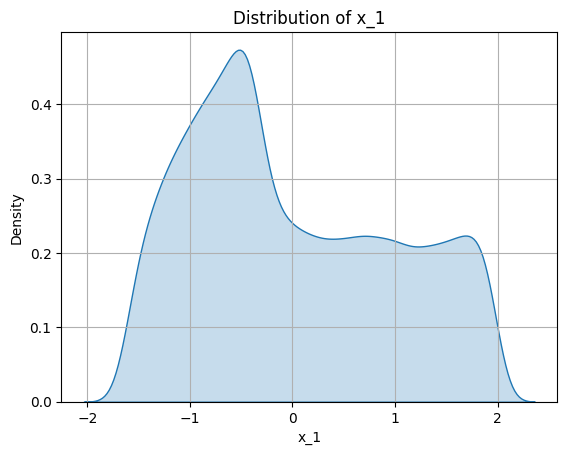

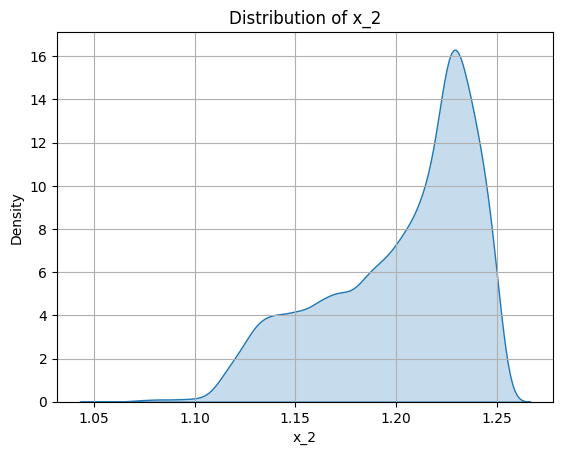

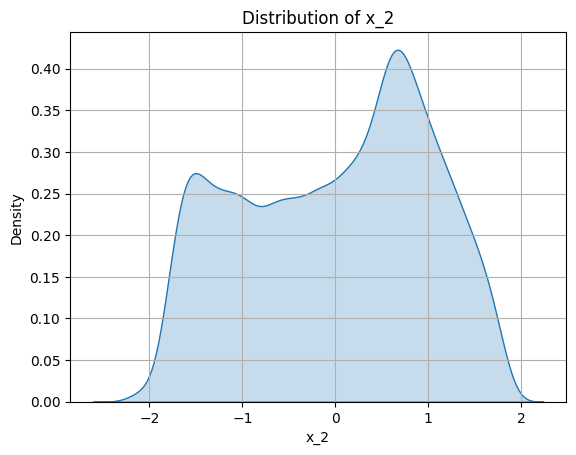

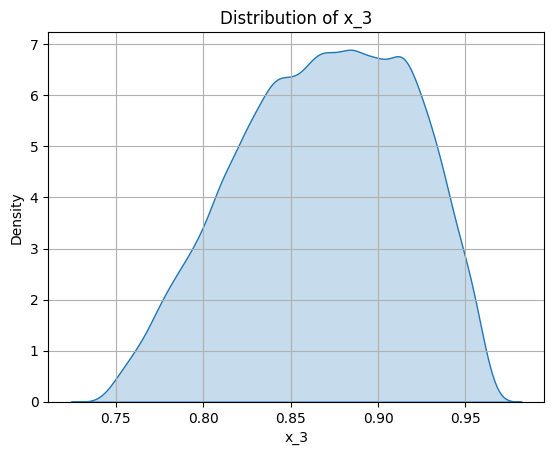

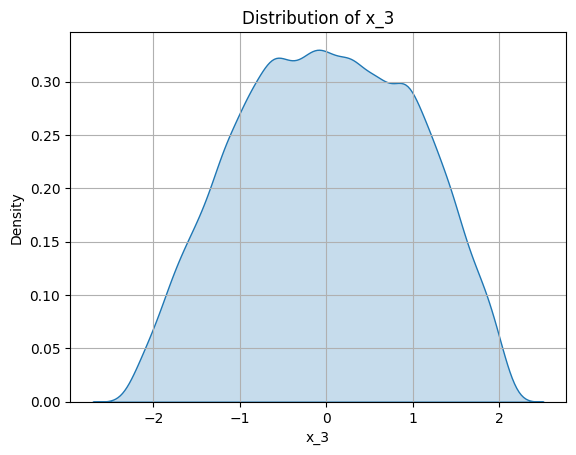

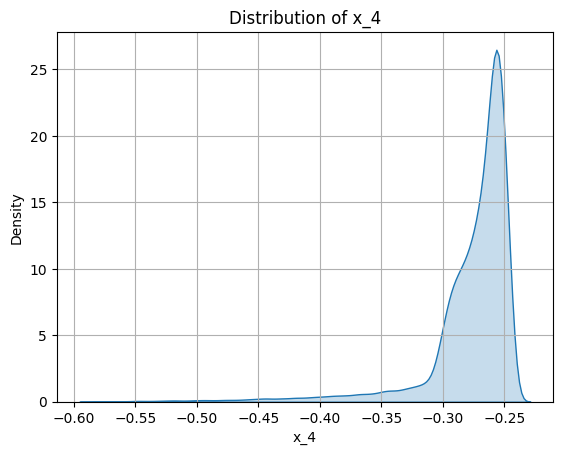

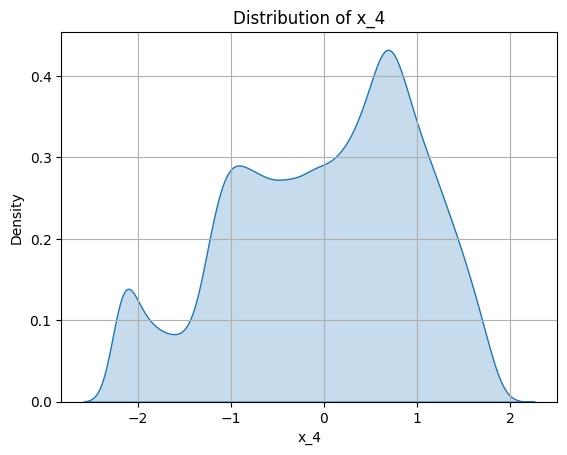

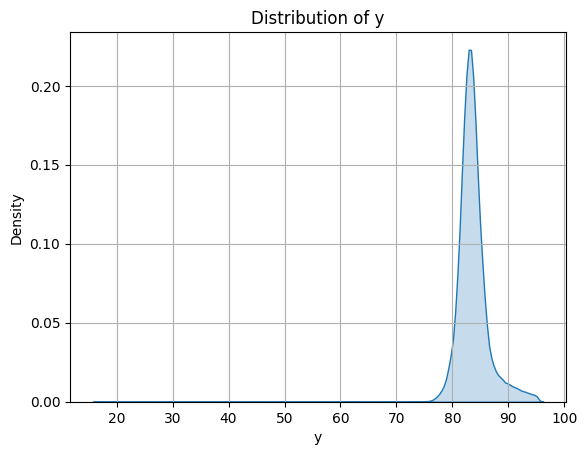

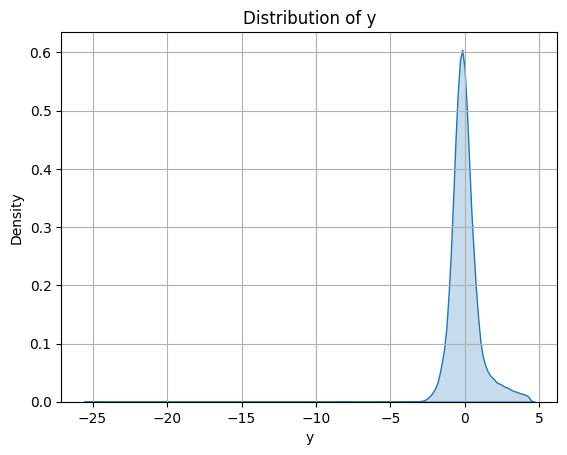

In [4]:
# columns to inspect
# columns = train_df_pt.columns
columns = ['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'y']

for col in columns:
    # myplt.plot_feature(train_df_pt, col)
    myplt.plot_feature_distribution(train_df, col)
    myplt.plot_feature_distribution(train_df_pt, col)
    # myplt.plot_feature_to_target(train_df_pt, col, 'y')
    # myplt.plot_feature_contribution(train_df_pt, col, 'y')

# plt.show()

In [5]:
# save the power transformed data
train_df_pt.insert(loc=0, column='ID', value=train_id)
train_df_pt.to_csv(os.path.join(ROOT_DIR, 'dataset', 'train_pt.csv'), index=False)